*****Segmenting Data with K Means Clustering*****

****1. Collect the data****

In [1]:
import pandas as pd
customers=pd.read_csv(r"C:\Users\Agnihotri\Documents\Python\Linkedin Learning\K Means using Python\mallcustomers.csv")
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


****2. Explore the data****

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customers.describe(include="all").round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

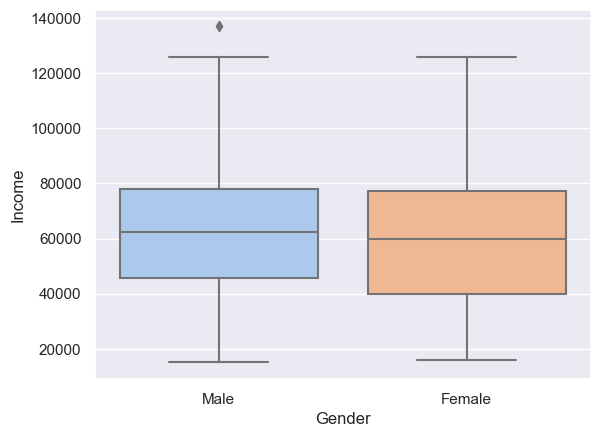

In [6]:
ax=sns.boxplot(data=customers,
               x='Gender',
               y='Income',
               palette='pastel')

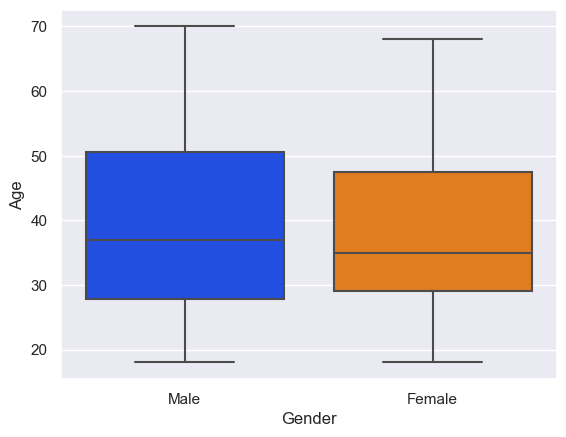

In [7]:
ax=sns.boxplot(data=customers,
               x='Gender',
               y='Age',
               palette='bright')

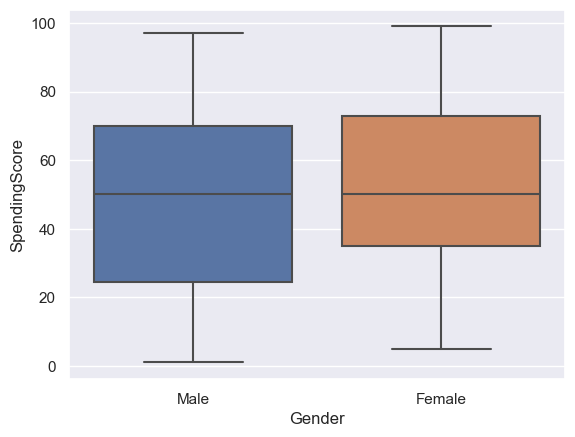

In [8]:
ax=sns.boxplot(data=customers,
               x='Gender',
               y='SpendingScore',
               palette='deep')

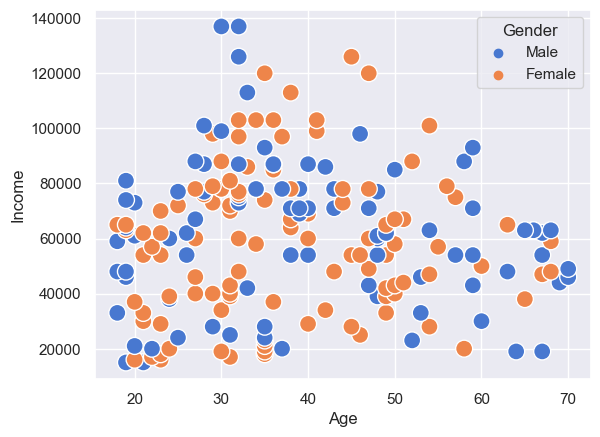

In [9]:
ax=sns.scatterplot(data=customers,
               x='Age',
               y='Income',
               s=150,
               hue="Gender", palette="muted")

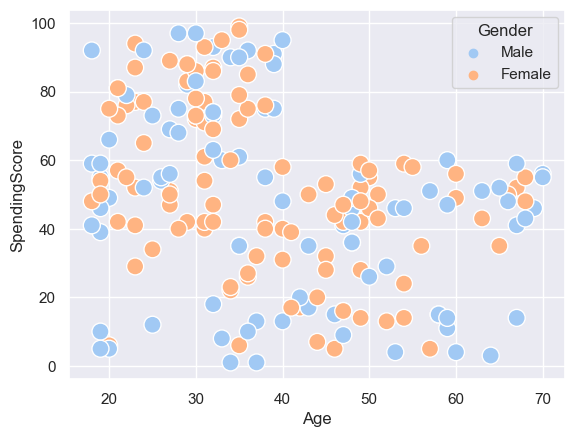

In [10]:
ax=sns.scatterplot(data=customers,
               x='Age',
               y='SpendingScore',
               s=150,
               hue="Gender", palette="pastel")

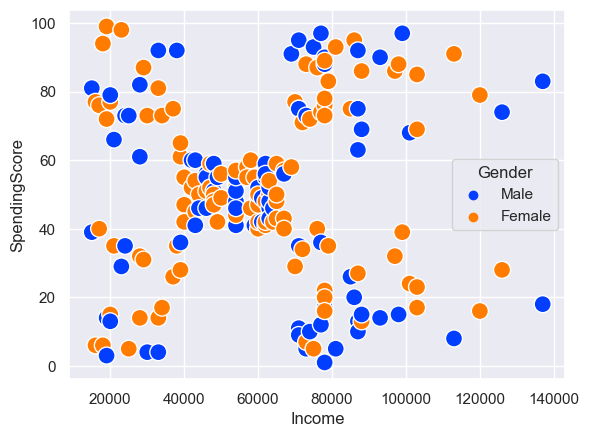

In [11]:
ax=sns.scatterplot(data=customers,
               x='Income',
               y='SpendingScore',
               s=150,
               hue="Gender", palette="bright")

****3. Prepare the data****

In [12]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


The Std for Spending score is way less than the std of income, if we do K Means clustering now, as it takes euclidean distance to quantify similarity, the income feature will dominate the distance calculateions and spending score will have little to no impact on the process. Hence, we need to normalize or standardize these two features in the dataset.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
customers_scaled=scaler.fit_transform(customers[['Income','SpendingScore']])

In [15]:
customers_scaled=pd.DataFrame(customers_scaled, columns=['Income', 'SpendingScore'])

In [16]:
customers_scaled.describe().round(2) #the process is called Z-score normalization

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


****4. Create the clusters****

In [17]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, n_init=25, random_state=1234)

n_clusters: This parameter specifies the number of clusters to form as well as the number of centroids to generate. In this case, we've set it to 3, meaning we want to identify 3 clusters.
n_init: This parameter specifies the number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia (sum of squared distances from each point to its assigned centroid).weu've set it to 25.
random_state: This parameter sets the random state for centroid initialization. Setting a random state ensures reproducibility of resultsweou've set it to 1234.
This code sets up a KMeans clustering model with 3 clusters, 25 initializations, and a specific random state for reproducibility.

In [18]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [19]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

To get cluster assignments, we reference the labels attributes of the km object. The result is a NumPy array of cluster assignments. The cluster assignments correspond to the order of instances in the customer scale data set. So the first item in the data is assigned to cluster zero. While the last item is assigned to cluster two.

In [20]:
km.inertia_

#this is the total within cluster sum of squared, WCSS

157.70400815035947

****5. Evaluate and Visualize the clusters****

In [21]:
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
Name: count, dtype: int64

In [22]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [23]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


The center of each cluster also provides us with some useful information about the quality of our clusters. The cluster_centers attribute of our cluster object km provides us with the coordinates of the cluster centers or centroids as a NumPy array. To make the cluster centers easier to interpret, we create a data frame called cluster_centers using Income and SpendingScore as the column names. Because we used the z-score approach to normalize our data, the x-y coordinates for the average income and spending score will be zero. This means that we can interpret the numbers for the first cluster to mean that customers in that cluster have a slightly lower than average income and about average spending scores. Customers in the second cluster have higher than average income but lower than average spending scores and customers in the third cluster have higher than average income and spending scores.

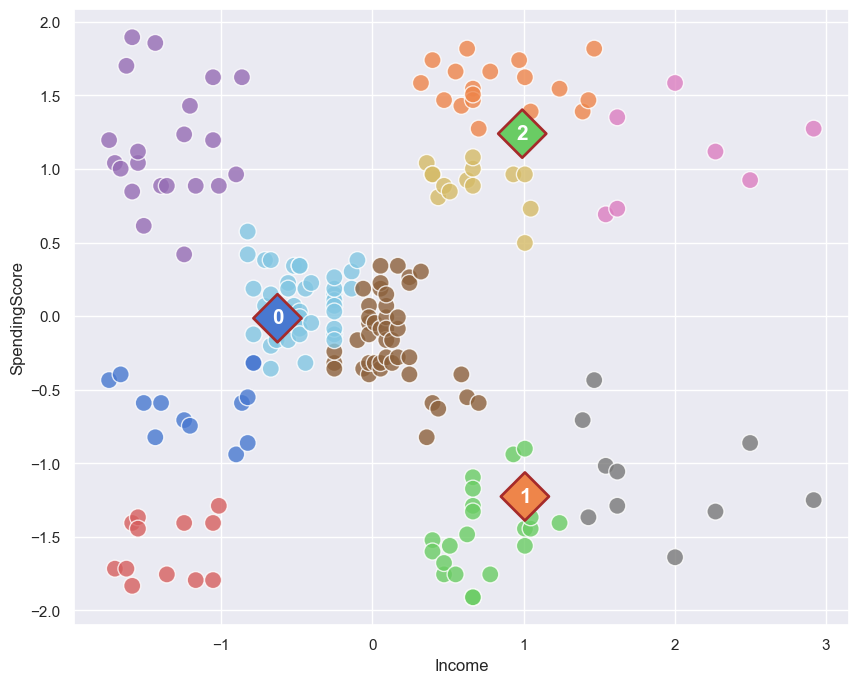

In [37]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'muted', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'muted', 
                     s = 600,
                     marker = 'D',
                     edgecolor = 'brown', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

****6. Choosing the right number of clusters****

The passage describes the process of determining the appropriate number of clusters, \( k \), for a dataset after clustering, evaluating, and visualizing the clusters. Three statistical approaches are used:

1. **Within Cluster Sum of Squares (WCSS) Method (Elbow Method):** The WCSS is plotted as a function of \( k \). The code iterates through \( k \) values from two to 10, clustering the data for each \( k \) value. The WCSS for each \( k \) is calculated and stored in a list. The plot suggests the appropriate \( k \) value by identifying the point of inflection, known as the "elbow." In this case, the elbow point suggests \( k = 5 \).

2. **Average Silhouette Score Method:** The average silhouette score is plotted as a function of \( k \). The silhouette score measures how similar an object is to its own cluster compared to other clusters. The code iterates through \( k \) values from 2 to 10, clustering the data for each \( k \) value and calculating the average silhouette score. The plot suggests the optimal \( k \) value as the one corresponding to the highest average silhouette score. Again, \( k = 5 \) is suggested.

3. **Calinski-Harabasz Score Method:** The Calinski-Harabasz score is plotted as a function of \( k \). This score measures the ratio of between-cluster dispersion to within-cluster dispersion. The code iterates through \( k \) values from 2 to 10, clustering the data for each \( k \) value and calculating the Calinski-Harabasz score. The plot suggests the optimal \( k \) value as the one corresponding to either the highest score or the first abrupt elbow. In this case, \( k = 5 \) or \( k = 9 \) are suggested.

All three statistical approaches suggest \( k = 5 \) as the appropriate number of clusters.

**The Within Clusters Sum of Squared (WCSS)/Elbow Method**

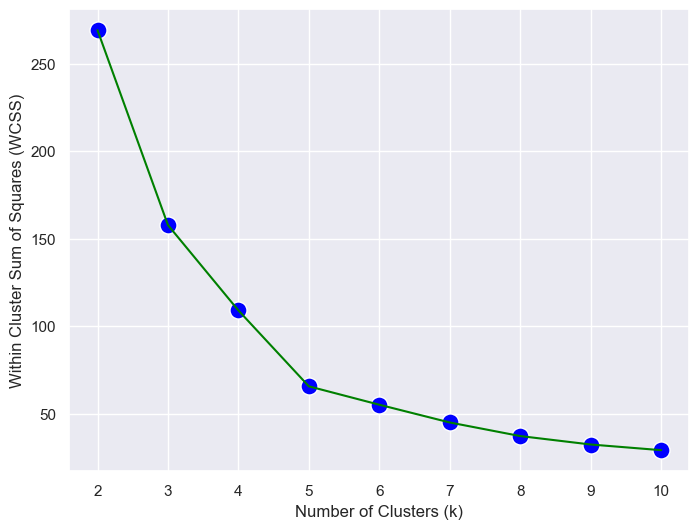

In [41]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index, color='green')
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150, color='blue')
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

**The Average Silohoute Score**

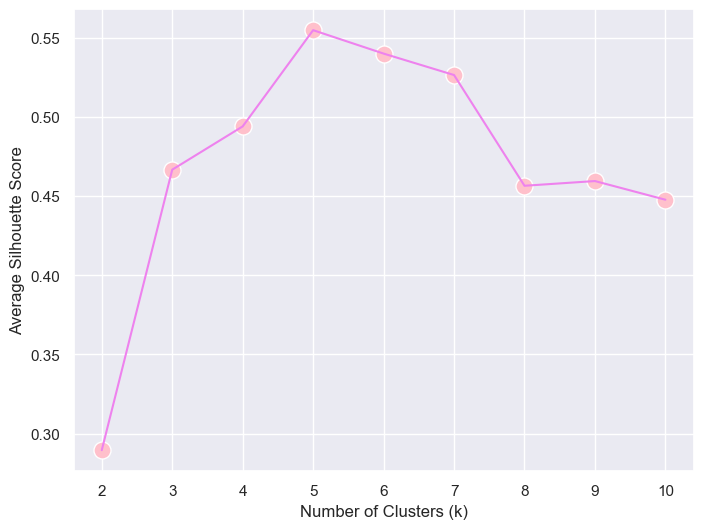

In [29]:
from sklearn.metrics import silhouette_score

silhouette=[]
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled,km.labels_))

silhouette_series=pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8,6))
ax=sns.lineplot(y=silhouette_series, x=silhouette_series.index, color='violet')
ax=sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150, color='pink')
ax=ax.set(xlabel='Number of Clusters (k)',
          ylabel='Average Silhouette Score')

**The Calinski Harabasz Score**

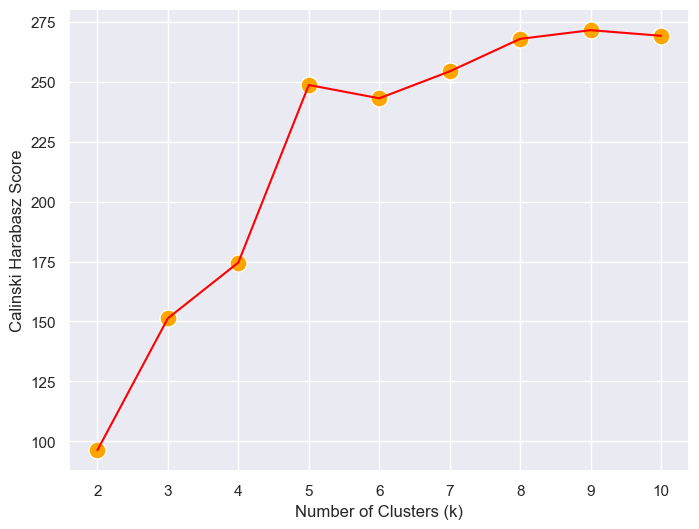

In [42]:
from sklearn.metrics import calinski_harabasz_score

calinski=[]
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled,km.labels_))

calinski_series=pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8,6))
ax=sns.lineplot(y=calinski_series, x=calinski_series.index, color='red')
ax=sns.scatterplot(y=calinski_series, x=calinski_series.index, s=150, color='orange')
ax=ax.set(xlabel='Number of Clusters (k)',
          ylabel='Calinski Harabasz Score')

****7. Analyzing and Interpreting the clusters****

In [44]:
new_km=KMeans(n_clusters=5, n_init=25, random_state=1234)
new_km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [46]:
new_km.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [49]:
new_km.inertia_

65.56840815571681

In [50]:
pd.Series(new_km.labels_).value_counts().sort_index()

0    23
1    35
2    39
3    22
4    81
Name: count, dtype: int64

In [51]:
new_km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617]])

In [52]:
new_cluster_centers = pd.DataFrame(new_km.cluster_centers_, 
                               columns = ['Income', 'SpendingScore'])
new_cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,1.055003,-1.284439
2,0.991583,1.239503
3,-1.329545,1.132178
4,-0.200913,-0.026456


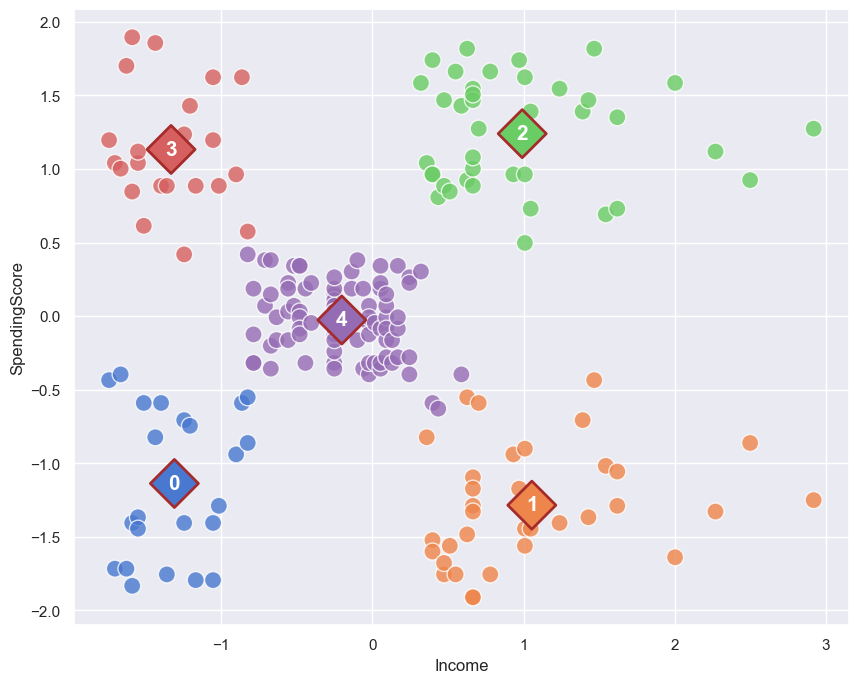

In [53]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = new_km.labels_, 
                     palette = 'muted', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = new_cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = new_cluster_centers.index, 
                     palette = 'muted', 
                     s = 600,
                     marker = 'D',
                     edgecolor = 'brown', 
                     legend = False)

# Add Centroid Labels
for i in range(len(new_cluster_centers)):
               plt.text(x = new_cluster_centers.Income[i], 
                        y = new_cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

Now we've segmented our data into five clusters, we can assign the cluster numbers to each of the customers in the original data and analyze the characteristics of each segment.

In [59]:
customers['Cluster']=new_km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,3
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,3
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,3


In [60]:
customers=pd.get_dummies(customers, columns=['Gender'])
customers.head()

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,False,True
1,2,21,15000,81,3,False,True
2,3,20,16000,6,0,True,False
3,4,23,16000,77,3,True,False
4,5,31,17000,40,0,True,False


We can now get descriptive statistics for the two gender features. The Age feature, the Income feature, and in SpendingScore feature. Because we dummy coded the Gender feature, the mean of the Gender_Female and Gender_Male features provide us with the frequency distribution for each gender. 56% of the customers in the dataset are female, while 44% are male. We also see that the median age income and spending score values are 36, $61,500 and 50 respectively.

In [61]:
customers.agg({
    'Gender_Female':'mean',
    'Gender_Male':'mean',
    'Age':'median',
    'Income':'median',
    'SpendingScore':'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [62]:
#descriptive statistics group by clusters

customers.groupby('Cluster').agg({
           'Gender_Female':'mean',
           'Gender_Male':'mean',
           'Age':'median',
           'Income':'median',
           'SpendingScore':'median'}).round(2) 

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0


we see that the representation of women in clusters zero is higher than the average and the customers in cluster zero tend to be older, earn less and spend less than the average. The customers in cluster one are more likely to be male, they tend to be older than the average, earn more than the average but spend less than the average customer. The customers in cluster two mimic the gender distribution of the entire dataset. They are slightly younger than average, but earn and spend more than the average. The gender distribution of customers in cluster three also mimics that of the entire dataset. However, they tend to be much younger and earn less than the average customer. Interestingly, they tend to spend more than the average customer. Similar to cluster three, the gender distribution of customers in cluster four mimics data the overall dataset. However, they tend to be older than the average, earn a little less than the average, but have an average spending score. In terms of a customer relations strategy, it would make sense to invest in increasing the spending of the high earning low spending customers in cluster one. Secondly, it would make sense to keep the high earning, high spending customers in cluster two happy. And thirdly, it would make sense to keep a watchful eye on the low earning high spending customers in cluster three.